<a href="https://colab.research.google.com/github/ReymonDwiTandiboro/DataMining/blob/main/uts_datamining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import files
uploaded = files.upload()


Saving DatasetCuaca_convert.xlsx to DatasetCuaca_convert.xlsx


In [5]:
df = pd.read_excel('DatasetCuaca_convert.xlsx')
df.to_csv('data.csv', index=False)
df.head(10)

,Bulan dan Tahun,Suhu Udara,Tekanan Udara,Kelembapan Udara,Kecepatan Angin,Curah Hujan
0,2019-01-01,27.9,1009.0,83.1,4.5,97.1
1,2019-02-01,27.6,1011.0,81.6,5.0,134.7
2,2019-03-01,27.8,1009.6,81.5,4.6,118.1
3,2019-04-01,27.9,1008.9,85.1,4.2,333.9
4,2019-05-01,27.8,1009.5,83.9,4.1,193.7
5,2019-06-01,26.7,1009.5,89.6,4.9,362.0
6,2019-07-01,25.6,1010.2,89.7,5.2,298.0
7,2019-08-01,25.9,1010.5,85.9,6.2,141.0
8,2019-09-01,26.2,1011.4,84.8,6.5,76.7
9,2019-10-01,26.8,1009.4,88.0,4.5,360.0


In [52]:
df = pd.read_csv('data.csv')
delcol = ['Bulan dan Tahun','Tekanan Udara','Kecepatan Angin']
df = df.drop(delcol, axis=1)

In [53]:
df.head(10)

,Suhu Udara,Kelembapan Udara,Curah Hujan
0,27.9,83.1,97.1
1,27.6,81.6,134.7
2,27.8,81.5,118.1
3,27.9,85.1,333.9
4,27.8,83.9,193.7
5,26.7,89.6,362.0
6,25.6,89.7,298.0
7,25.9,85.9,141.0
8,26.2,84.8,76.7
9,26.8,88.0,360.0


In [54]:
mean = df['Suhu Udara'].mean()
median = df['Suhu Udara'].median()
modus = df['Suhu Udara'].mode().iloc[0]

print("Suhu Udara")
print("Mean : ", mean)
print("Median : ", median)
print("Modus : ", modus)

Suhu Udara
Mean :  27.16111111111111
Median :  27.2
Modus :  26.6


In [55]:
mean = df['Curah Hujan'].mean()
median = df['Curah Hujan'].median()
modus = df['Curah Hujan'].mode().iloc[0]

print("Curah Hujan")
print("Mean : ", mean)
print("Median : ", median)
print("Modus : ", modus)

Curah Hujan
Mean :  273.2527777777778
Median :  239.6
Modus :  25.9


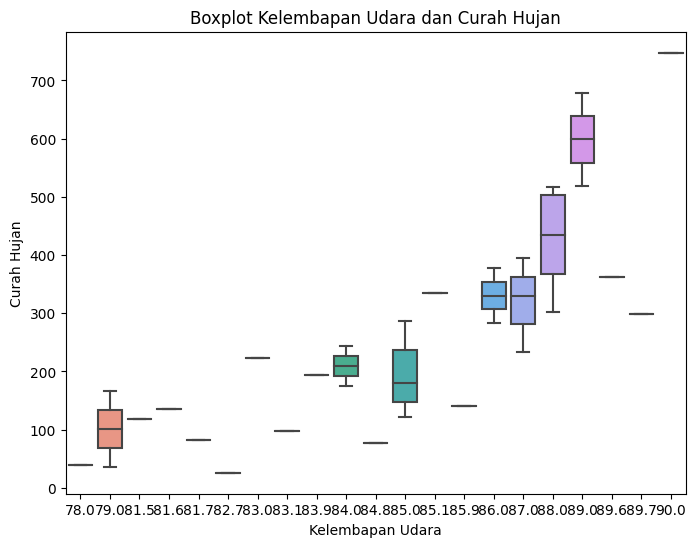

In [56]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Kelembapan Udara', y='Curah Hujan', data=df)
plt.title('Boxplot Kelembapan Udara dan Curah Hujan')
plt.show()

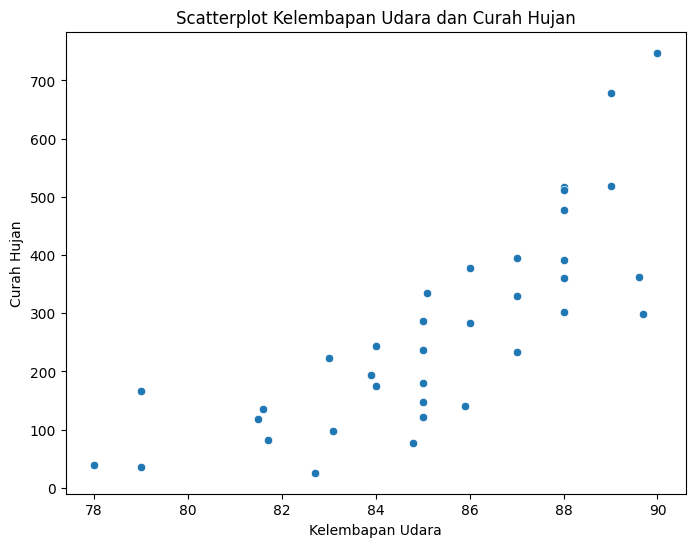

In [62]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Kelembapan Udara', y='Curah Hujan', data=df)
plt.title('Scatterplot Kelembapan Udara dan Curah Hujan')
plt.show()

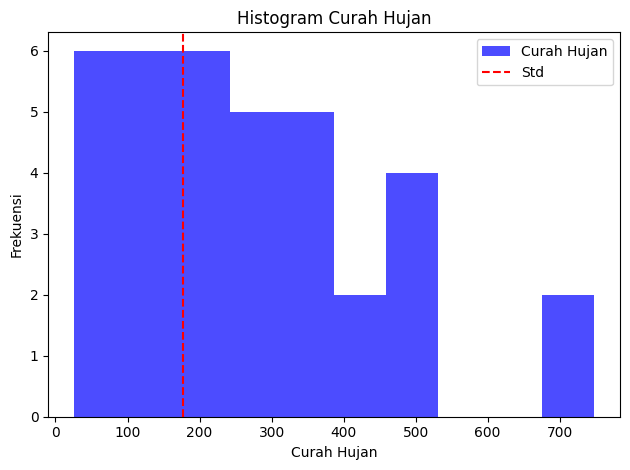

Standar Deviasi :  176.6402307938954


In [65]:
import numpy as np

ch = df['Curah Hujan']
stdch = ch.std()

plt.hist(ch, bins=10, color='blue', alpha=0.7, label='Curah Hujan')
plt.axvline(stdch, color='red', linestyle='dashed', linewidth=1.5, label='Std')
plt.xlabel('Curah Hujan')
plt.ylabel('Frekuensi')
plt.title('Histogram Curah Hujan')
plt.legend()

plt.tight_layout()
plt.show()
print("Standar Deviasi : ", stdch)

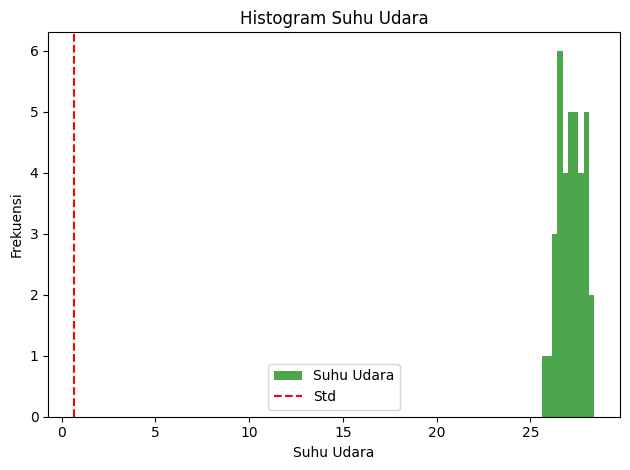

Standar Deviasi :  0.6688621257104311


In [67]:
su = df['Suhu Udara']
sustd = np.std(su)

plt.hist(su, bins=10, color='green', alpha=0.7, label='Suhu Udara')
plt.axvline(sustd, color='red', linestyle='dashed', linewidth=1.5, label='Std')
plt.xlabel('Suhu Udara')
plt.ylabel('Frekuensi')
plt.title('Histogram Suhu Udara')
plt.legend()

plt.tight_layout()
plt.show()
print("Standar Deviasi : ", sustd)

In [90]:
df = pd.read_csv('data.csv')
delcol = ['Bulan dan Tahun','Tekanan Udara','Kecepatan Angin']
new_df = df.drop(delcol, axis=1)

summary_stats = new_df.describe()
correlation_matrix = new_df.corr()
q1 = new_df.quantile(0.25)
q3 = new_df.quantile(0.75)
iqr = q3 - q1
outliers = ((new_df<(q1 - 1.5 * iqr)) | (new_df>(q3 + 1.5 * iqr))).sum()

with open('report.txt', 'w') as file:
    # Statistik dasar
    file.write("Summary Statistics:\n")
    file.write(str(summary_stats) + '\n\n')

    # Korelasi antar kolom
    file.write("Correlation:\n")
    file.write(str(correlation_matrix) + '\n\n')

    # Data anomali
    file.write("Outliers:\n")
    file.write(str(outliers) + '\n\n')

print(str(summary_stats)  + '\n\n')
print(str(correlation_matrix)  + '\n\n')
print(str(outliers))

       Suhu Udara  Kelembapan Udara  Curah Hujan
count   36.000000         36.000000    36.000000
mean    27.161111         85.294444   273.252778
std      0.678350          3.106670   176.640231
min     25.600000         78.000000    25.900000
25%     26.675000         83.700000   139.425000
50%     27.200000         85.050000   239.600000
75%     27.800000         88.000000   365.750000
max     28.400000         90.000000   747.600000


                  Suhu Udara  Kelembapan Udara  Curah Hujan
Suhu Udara          1.000000         -0.776007    -0.557558
Kelembapan Udara   -0.776007          1.000000     0.788839
Curah Hujan        -0.557558          0.788839     1.000000


Suhu Udara          0
Kelembapan Udara    0
Curah Hujan         1
dtype: int64
